In [1]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import glob
from PIL import Image
import PIL

In [2]:
train_files = glob.glob("C:/Users/anwes/Downloads/archive/chest_xray/train/*/**")

In [3]:
train_files

['C:/Users/anwes/Downloads/archive/chest_xray/train\\NORMAL\\IM-0115-0001.jpeg',
 'C:/Users/anwes/Downloads/archive/chest_xray/train\\NORMAL\\IM-0117-0001.jpeg',
 'C:/Users/anwes/Downloads/archive/chest_xray/train\\NORMAL\\IM-0119-0001.jpeg',
 'C:/Users/anwes/Downloads/archive/chest_xray/train\\NORMAL\\IM-0122-0001.jpeg',
 'C:/Users/anwes/Downloads/archive/chest_xray/train\\NORMAL\\IM-0125-0001.jpeg',
 'C:/Users/anwes/Downloads/archive/chest_xray/train\\NORMAL\\IM-0127-0001.jpeg',
 'C:/Users/anwes/Downloads/archive/chest_xray/train\\NORMAL\\IM-0128-0001.jpeg',
 'C:/Users/anwes/Downloads/archive/chest_xray/train\\NORMAL\\IM-0129-0001.jpeg',
 'C:/Users/anwes/Downloads/archive/chest_xray/train\\NORMAL\\IM-0131-0001.jpeg',
 'C:/Users/anwes/Downloads/archive/chest_xray/train\\NORMAL\\IM-0133-0001.jpeg',
 'C:/Users/anwes/Downloads/archive/chest_xray/train\\NORMAL\\IM-0135-0001.jpeg',
 'C:/Users/anwes/Downloads/archive/chest_xray/train\\NORMAL\\IM-0137-0001.jpeg',
 'C:/Users/anwes/Downloads/a

In [4]:
len(train_files)

5216

In [5]:
from random import shuffle
shuffle(train_files)

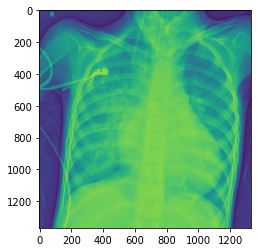

In [6]:
from PIL import Image
im = Image.open(train_files[691])
im_arr=np.array(im)
plt.imshow(im);



In [7]:
print(im_arr.shape)


(1368, 1328)


In [8]:
X_train = np.zeros((len(train_files), 128, 128))
Y_train = np.zeros((len(train_files), 1))
for i, fi in enumerate(train_files):
    im = Image.open(fi)
    img = Image.open(fi).convert('L')
    resized_im = img.resize((128,128))
    X_train[i,:,:]=np.array(resized_im)
    Y_train[i, :] = fi[-6]
    

In [9]:
X_train = X_train/255.0
X_train

array([[[0.22745098, 0.24313725, 0.25490196, ..., 0.2745098 ,
         0.27058824, 0.27843137],
        [0.23137255, 0.24705882, 0.25882353, ..., 0.29803922,
         0.29019608, 0.28627451],
        [0.23137255, 0.25098039, 0.2627451 , ..., 0.32941176,
         0.32156863, 0.31372549],
        ...,
        [0.15686275, 0.15686275, 0.15686275, ..., 0.18039216,
         0.18039216, 0.17647059],
        [0.15686275, 0.15686275, 0.15686275, ..., 0.18039216,
         0.18039216, 0.17647059],
        [0.15686275, 0.15686275, 0.15294118, ..., 0.17647059,
         0.18039216, 0.18039216]],

       [[0.12156863, 0.11372549, 0.12156863, ..., 0.20784314,
         0.24313725, 0.27058824],
        [0.1254902 , 0.11764706, 0.11764706, ..., 0.32941176,
         0.3254902 , 0.32941176],
        [0.14117647, 0.11764706, 0.11764706, ..., 0.24705882,
         0.21960784, 0.18823529],
        ...,
        [0.16862745, 0.1372549 , 0.1372549 , ..., 0.16470588,
         0.18039216, 0.21176471],
        [0.1

In [10]:
# Sequantial -> Layers - Conv, Dense, 
# Relu , Leaky Relu
model= keras.Sequential([
    # 1
    keras.layers.Conv2D(
    filters=120,
    kernel_size=3,
        # filtering out negative values
    activation='relu',
    input_shape=(128,128,1)
    ),
    # 2
    keras.layers.Conv2D(
    filters=24,
    kernel_size=3,
    activation='relu',
    ),
    # 3
    # 1d matrix
    keras.layers.Flatten(),
    # 4
    # reduction layers
    keras.layers.Dense(
        units=96,
        activation='relu',
    ),
    # 5 
    # 96 units -> 6 units
    keras.layers.Dense(6,activation='softmax') # 0-5 fingers
    
])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 120)     1200      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 24)      25944     
                                                                 
 flatten (Flatten)           (None, 369024)            0         
                                                                 
 dense (Dense)               (None, 96)                35426400  
                                                                 
 dense_1 (Dense)             (None, 6)                 582       
                                                                 
Total params: 35,454,126
Trainable params: 35,454,126
Non-trainable params: 0
_________________________________________________________________


In [13]:
X_train=X_train.reshape(len(X_train),128,128,1)

In [14]:
X_train.shape

(5216, 128, 128, 1)

In [15]:
# Training model
# Data -> 18000
# Train + Test + Validation
# Train data + Test Data
# Validation/Test Data -> (0.1*18000) -> 1800
# Train Data -> 18000-1800
model.fit(X_train, Y_train,epochs=2 ,validation_split=0.1)


Epoch 1/2


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 707, in start
      self.io_loop.start()
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 502, in dispatch_queue
      await self.process_one()
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 491, in process_one
      await dispatch(*args)
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 398, in dispatch_shell
      await result
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 722, in execute_request
      reply_content = await reply_content
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 389, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\anwes\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\anwes\AppData\Local\Temp\ipykernel_22480\3630491317.py", line 7, in <cell line: 7>
      model.fit(X_train, Y_train,epochs=2 ,validation_split=0.1)
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\Users\anwes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 9 which is outside the valid range of [0, 6).  Label values: 1 2 1 4 1 1 1 4 1 9 1 8 3 2 9 7 1 7 3 1 4 1 4 4 2 5 6 1 1 1 8 4
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_765]

In [ ]:
Y_train.shape

(5216, 1)

In [ ]:
type(Y_train)

numpy.ndarray